In [1]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import glob
import seaborn as sns
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Read the csv file into a pandas DataFrame
player = pd.concat([pd.read_csv(f) for f in glob.glob('player_data/*.csv')], 
                             ignore_index = True)

player

,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,PIM,...,EV.1,PP.1,SH.1,S,TOI,ATOI,BLK,HIT,FOW,FOL
0,Spencer Abbott\abbotsp01,28,CHI,LW,1,0,0,0,0,0,...,0,0,0,1,9,8:34,0.0,0,0.0,0.0
1,Justin Abdelkader\abdelju01,29,DET,LW,64,7,14,21,-20,50,...,11,2,1,104,1066,16:40,27.0,144,5.0,12.0
2,Pontus Aberg\abergpo01,23,NSH,LW,15,1,1,2,-2,4,...,1,0,0,12,185,12:20,2.0,9,1.0,0.0
3,Noel Acciari\acciano01,25,BOS,C,29,2,3,5,3,16,...,3,0,0,24,301,10:22,5.0,80,11.0,18.0
4,Kenny Agostino\agostke01,24,STL,LW,7,1,2,3,0,2,...,1,1,0,17,89,12:47,3.0,9,0.0,0.0
5,Sebastian Aho\ahose01,19,CAR,RW,82,24,25,49,-1,26,...,13,11,1,214,1377,16:47,14.0,51,17.0,18.0
6,Karl Alzner\alzneka01,28,WSH,D,82,3,10,13,23,28,...,10,0,0,81,1623,19:47,162.0,105,0.0,0.0
7,Josh Anderson\anderjo05,22,CBJ,RW,78,17,12,29,12,89,...,12,0,0,119,938,12:01,40.0,147,8.0,21.0
8,Rasmus Andersson\anderra01,20,CGY,D,1,0,0,0,-1,0,...,0,0,0,0,19,18:33,2.0,4,0.0,0.0
9,Andy Andreoff\andrean01,25,LAK,LW,36,0,2,2,-2,70,...,2,0,0,38,381,10:36,7.0,70,41.0,28.0


In [3]:
# Drop duplicate players and NaN values
cleandf = player.drop(columns = ['Player', 'Tm', 'Pos', 'ATOI'])
cleandf.head()

,Age,GP,G,A,PTS,+/-,PIM,PS,EV,PP,...,GW,EV.1,PP.1,SH.1,S,TOI,BLK,HIT,FOW,FOL
0,28,1,0,0,0,0,0,0.0,0,0,...,0,0,0,0,1,9,0.0,0,0.0,0.0
1,29,64,7,14,21,-20,50,0.7,2,5,...,1,11,2,1,104,1066,27.0,144,5.0,12.0
2,23,15,1,1,2,-2,4,-0.1,1,0,...,0,1,0,0,12,185,2.0,9,1.0,0.0
3,25,29,2,3,5,3,16,0.5,2,0,...,0,3,0,0,24,301,5.0,80,11.0,18.0
4,24,7,1,2,3,0,2,0.3,1,0,...,0,1,1,0,17,89,3.0,9,0.0,0.0


In [4]:
cleandf['PTS'].describe()
cleandf.sum()

Age      234597.0
GP       444191.0
G         67604.0
A        115240.0
PTS      182844.0
+/-       -3185.0
PIM      270153.0
PS        22589.1
EV        49903.0
PP        15690.0
SH         2011.0
GW        10855.0
EV.1      83298.0
PP.1      29807.0
SH.1       2135.0
S        744470.0
TOI     7328882.0
BLK      342357.0
HIT      548485.0
FOW      725170.0
FOL      725158.0
dtype: float64

In [5]:
# Replace NAN values with the mean
cleandf.fillna(cleandf.mean(), inplace=True)

In [6]:
# Preprocessing the data
bins = (-1, 34.5, 113)
group_names = ['no_playoffs', 'playoffs']
cleandf['PTS'] = pd.cut(cleandf['PTS'], bins = bins, labels = group_names)
cleandf['PTS'].unique()

[no_playoffs, playoffs]
Categories (2, object): [no_playoffs < playoffs]

In [7]:
label_quality = LabelEncoder()

In [8]:
cleandf['PTS'] = label_quality.fit_transform(cleandf['PTS'])

In [9]:
# Dataframe displaying the newly transformed PTS column

cleandf.head(10)

,Age,GP,G,A,PTS,+/-,PIM,PS,EV,PP,...,GW,EV.1,PP.1,SH.1,S,TOI,BLK,HIT,FOW,FOL
0,28,1,0,0,0,0,0,0.0,0,0,...,0,0,0,0,1,9,0.0,0,0.0,0.0
1,29,64,7,14,0,-20,50,0.7,2,5,...,1,11,2,1,104,1066,27.0,144,5.0,12.0
2,23,15,1,1,0,-2,4,-0.1,1,0,...,0,1,0,0,12,185,2.0,9,1.0,0.0
3,25,29,2,3,0,3,16,0.5,2,0,...,0,3,0,0,24,301,5.0,80,11.0,18.0
4,24,7,1,2,0,0,2,0.3,1,0,...,0,1,1,0,17,89,3.0,9,0.0,0.0
5,19,82,24,25,1,-1,26,5.9,17,6,...,4,13,11,1,214,1377,14.0,51,17.0,18.0
6,28,82,3,10,0,23,28,4.6,3,0,...,0,10,0,0,81,1623,162.0,105,0.0,0.0
7,22,78,17,12,0,12,89,4.0,17,0,...,3,12,0,0,119,938,40.0,147,8.0,21.0
8,20,1,0,0,0,-1,0,-0.1,0,0,...,0,0,0,0,0,19,2.0,4,0.0,0.0
9,25,36,0,2,0,-2,70,-0.4,0,0,...,0,2,0,0,38,381,7.0,70,41.0,28.0


In [10]:
# Count the values in each points category (non-playoff and playoff)

cleandf['PTS'].value_counts()

0    6778
1    2067
Name: PTS, dtype: int64

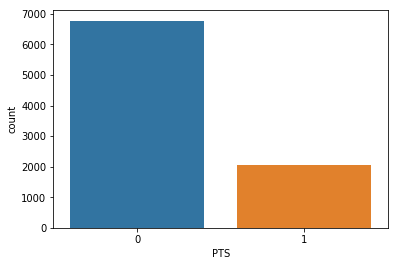

In [11]:
# Visualize the transformed points column distribution 
# using seaborn & matplotlib

sns.countplot(cleandf['PTS'])

In [12]:
# Assign the data to X and y, x predicts y

X = cleandf.drop('PTS', axis = 1)
y = cleandf["PTS"]


In [13]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Applying standard scaling to get optimized result and reduce large discrepancies
# between the data in each column.

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
# Visualize the scaled data created for X_train

X_train[:10]

array([[-0.33930397,  0.95918946,  0.48722302, -0.00722265, -1.22472857,
        -0.79078133, -0.30217167,  0.69394534,  0.06180581, -0.35157369,
        -0.69237602,  0.29789816, -0.44398827, -0.41282775,  0.40498043,
         0.53279534,  0.0468289 ,  0.60038186, -0.33336311, -0.34046877],
       [ 1.40776401,  0.16413815, -0.29823878, -0.8423155 , -0.38057481,
         1.76944418, -0.78944449, -0.09909479, -0.5928388 , -0.35157369,
        -0.12791725, -0.86101066, -0.62735928, -0.41282775, -0.40744706,
        -0.63233887, -0.48037988,  0.85034581, -0.39859391, -0.45567106],
       [-1.21283795,  0.78635222,  0.59943185,  0.06869488,  0.25254051,
        -0.59876442,  0.01107515,  1.01116139, -0.26551649, -0.35157369,
         0.43654153,  0.29789816, -0.26061727, -0.41282775,  0.66660962,
         0.13815311, -0.55227199, -0.5601651 , -0.38228621, -0.40959015],
       [-0.33930397,  0.47524518, -0.52265643, -0.53864537, -0.59161325,
         2.28148928, -0.33697687, -0.41631084, -

In [16]:
y_train[:10]

7760    0
6566    0
7918    0
1539    0
6961    0
1211    1
7293    1
7922    0
672     0
6198    0
Name: PTS, dtype: int64

# Random Forest

In [17]:
# Create Random Forest model

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [18]:
# Display the pred_rfc array

pred_rfc[:20]

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0])

In [19]:
# See how well the model performed

print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2030
           1       0.98      0.98      0.98       624

   micro avg       0.99      0.99      0.99      2654
   macro avg       0.99      0.99      0.99      2654
weighted avg       0.99      0.99      0.99      2654

[[2020   10]
 [  11  613]]


In [20]:
# Random Forest Accuracy Score

from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)
cm

0.9920874152223059

In [21]:
# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
# Create linear regression model and fit training and testing data
model = LinearRegression()

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7369350338742862
Testing Score: 0.7434053827723278


Text(0.5, 1.0, 'Residual Plot')

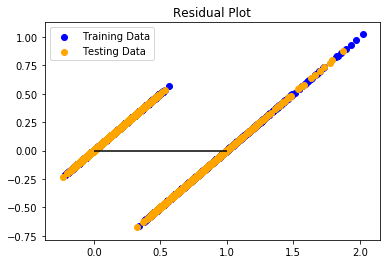

In [23]:
 # Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [24]:
# Print MSE and r2 values
predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

NameError: name 'mean_squared_error' is not defined